## 인공신경망

### 패션 MNIST 데이터
패션 MNIST 데이터 셋은 10 종류의 패션 아이템으로 구성되어 있습니다.

패션 MNIST의 타깃은 0~9까지의 숫자 레이블로 구성됩니다.
 
 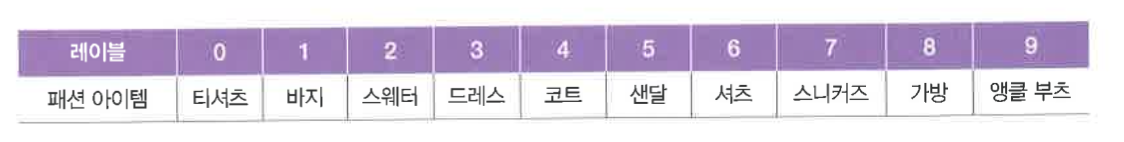

### 인공신경망
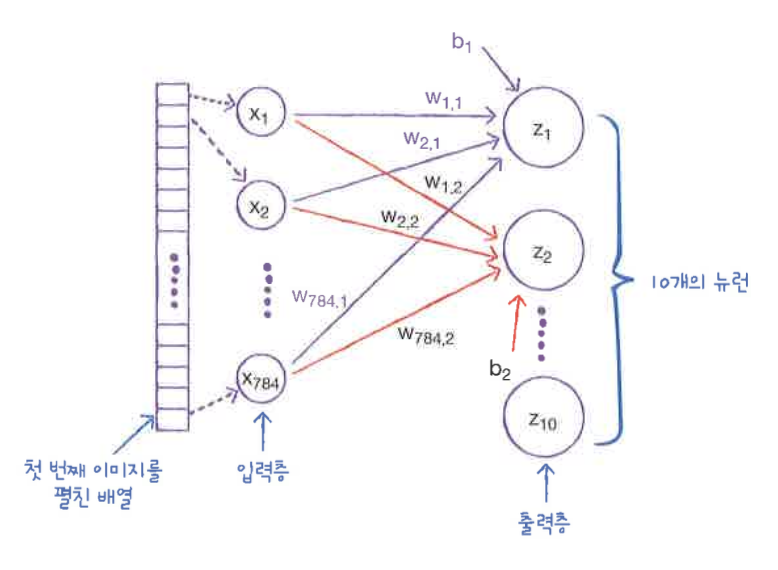

z값들을 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종 값을 만든다는 의미에서 출력층(output layer)이라고 부릅니다.

z값을 계산하는 단위를 뉴련(neuron)이라고 부릅니다.

x값들을 입력층(input layer)이라고 부릅니다.

w값들을 가중치(weight), b값들을 젎편(bias)라고 부릅니다.

### 텐서플로와 케라스
텐서플로(Tensorflow)는 구글이 2015년 오픈소스로 공개한 딥러닝 라이브러리입니다.

텐서플로에는 저수준 API와 고수준 API가 있는데 케라스(Keras)가 텐서플로의 고수준 API입니다.

딥러닝 라이브러리는 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련한다는 것입니다.

GPU는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈이 많이 수행되는 인공 신경망에 큰 도움이 됩니다.

케라스는 직관적이고 사용하기 편한 고수준 API를 제공합니다.

### 완전 연결층
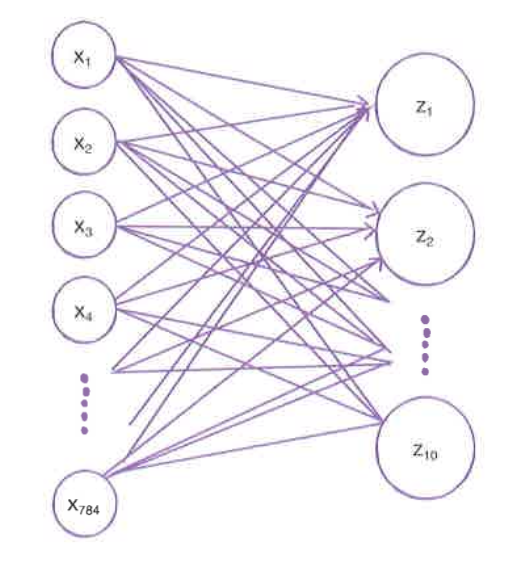

밀집층을 양쪽의 뉴련이 모두 연결하고 있기 때문에 완전 연결층(fully connected layer)이라고 부릅니다.

### 활성화 함수
소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화 함수(activation function)이라고 합니다.

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split


In [63]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [64]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


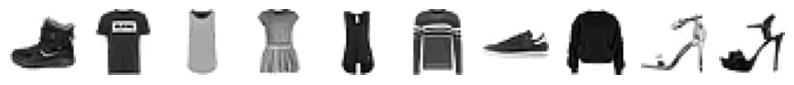

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [65]:
# 데이터 샘플 그림 출력
fig, ax = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    ax[i].imshow(train_input[i], cmap='gray_r')
    ax[i].axis('off')
plt.show()
print([train_target[i] for i in range(10)])

In [66]:
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [67]:
# SGDClassifier
# 데이터 전처리 후 1차원 배열로 변경
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [68]:
#교차 검증으로 성능 확인
sc = SGDClassifier(loss = 'log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reache

0.8199833333333333


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [69]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [73]:
# 케라스의 Dense 클래스를 사용해 밀집층 만들기
# 필요한 매개변수 : 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))

# 이 밀집층을 가진 신경망 모델을 만들기 위해 Sequential 사용
model = keras.Sequential(dense)

In [74]:
#손실 함수를 지정하기 위해 compile()에서 수행
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [75]:
# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 501us/step - loss: 0.6094 - accuracy: 0.7935
Epoch 2/5
1500/1500 [==============================] - 1s 524us/step - loss: 0.4791 - accuracy: 0.8395
Epoch 3/5
1500/1500 [==============================] - 1s 512us/step - loss: 0.4569 - accuracy: 0.8483
Epoch 4/5
1500/1500 [==============================] - 1s 526us/step - loss: 0.4446 - accuracy: 0.8530
Epoch 5/5
1500/1500 [==============================] - 1s 510us/step - loss: 0.4373 - accuracy: 0.8544


In [76]:
#모델 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 596us/step - loss: 0.4504 - accuracy: 0.8506


[0.4503595232963562, 0.8505833148956299]